(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

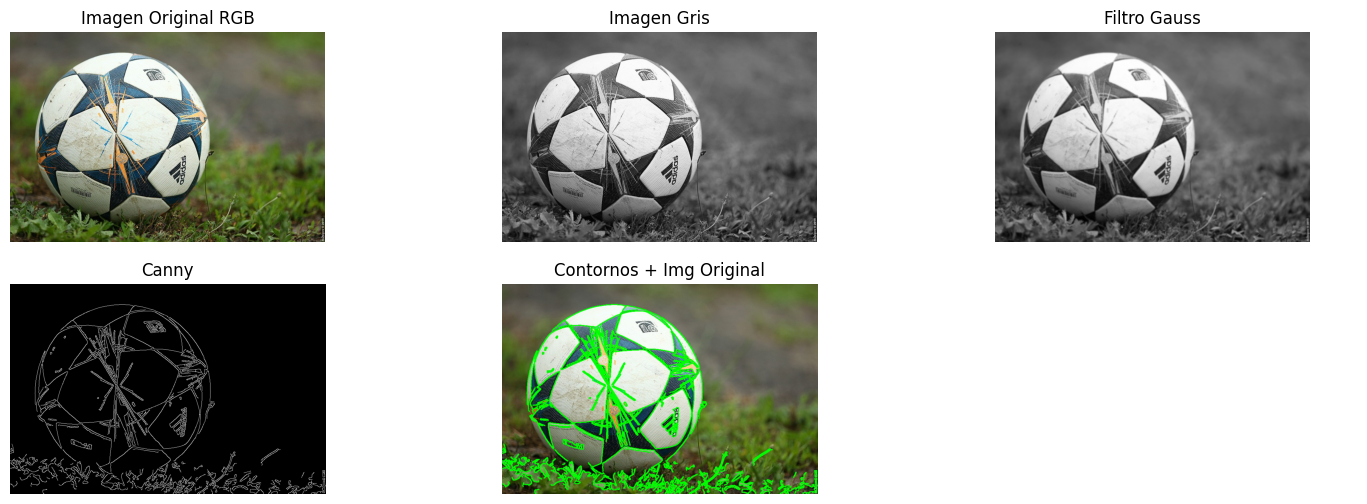

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

img = cv2.imread("p_fut.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (7, 7), 0)
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

output = img.copy()

cv2.drawContours(output, contours, -1, (0, 255, 0), thickness=2)

fig, axs = plt.subplots(2, 3, figsize=(18, 6))
axs = axs.flatten()

images = {
    'Imagen Original RGB': img,
    'Imagen Gris': gray,
    'Filtro Gauss': blurred,
    'Canny': edges,
    'Contornos + Img Original': output 
}

for i, (nombre, imagen) in enumerate(images.items()):
    if imagen.ndim == 3:
        axs[i].imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    else:
        axs[i].imshow(imagen, cmap='gray')

    axs[i].set_title(nombre)
    axs[i].axis('off')

axs[-1].axis('off')